# **This code is to understand kernel/Channel Visualization. The idea here to get feel of the  Interpretability in CNN** 

# Approach

*   Load pre-trained VGG with weights initializied for IMAGENET
*   Change the activation layer to Linear
*   Pick a few images
*   Show activations last few layers of the Network
*   A heatmap is generated that is overlayed on the original image













In [0]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from keras.utils import plot_model

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')


# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Plotting the model to identify the layers


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

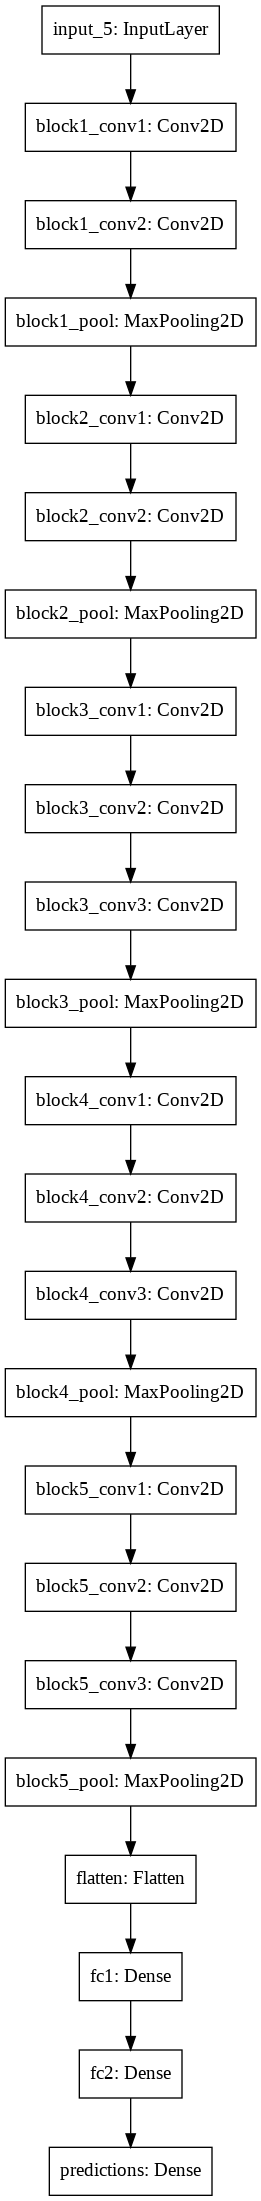

In [0]:
model.summary()
plot_model(model)

# Grad Cam for the "predictions" layer

Took 2 images from the internet 







/content/Downloads


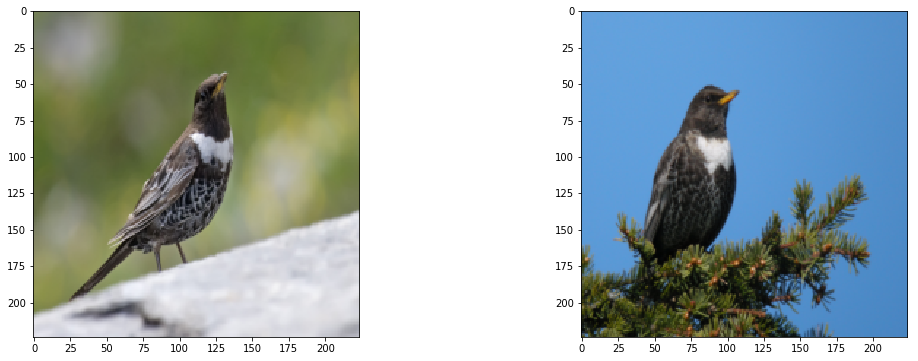

In [0]:
#!pip install scipy==1.1.0
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
#import urllib, cStringIO
from PIL import Image
import requests
from io import BytesIO
import os

#img = Image.open(BytesIO(response.content))

plt.rcParams['figure.figsize'] = (18, 6)

#file = cStringIO.StringIO(urllib.urlopen('https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg').read())
#img = Image.open(file)

download_path='/'.join( os.getcwd().split('/')[:3] ) + '/Downloads'

print(download_path)

#img1 = img.resize((224, 224))
#img2 = img.resize((224, 224))

response = requests.get('https://upload.wikimedia.org/wikipedia/commons/9/94/Ring_Ouzel.jpg')
img1 = utils.load_img(BytesIO(response.content), target_size=(224, 224))

response = requests.get('https://upload.wikimedia.org/wikipedia/commons/1/1b/Alpine_Ring_Ouzel_%28Turdus_torquatus%29%2C_Karwendel_mountains%2C_Austria_%285756291760%29.jpg')
img2 = utils.load_img(BytesIO(response.content), target_size=(224, 224))

response = requests.get('https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg')
ironman_img = utils.load_img(BytesIO(response.content), target_size=(224, 224))

#plt.imshow(img)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

<Figure size 1296x432 with 0 Axes>

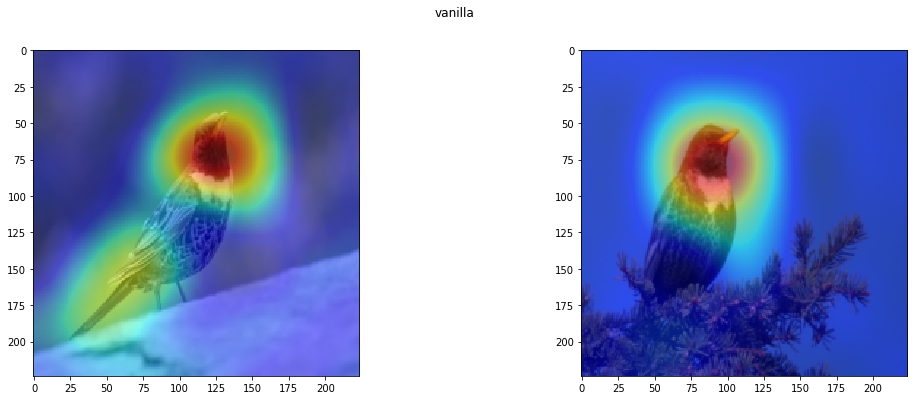

<Figure size 1296x432 with 0 Axes>

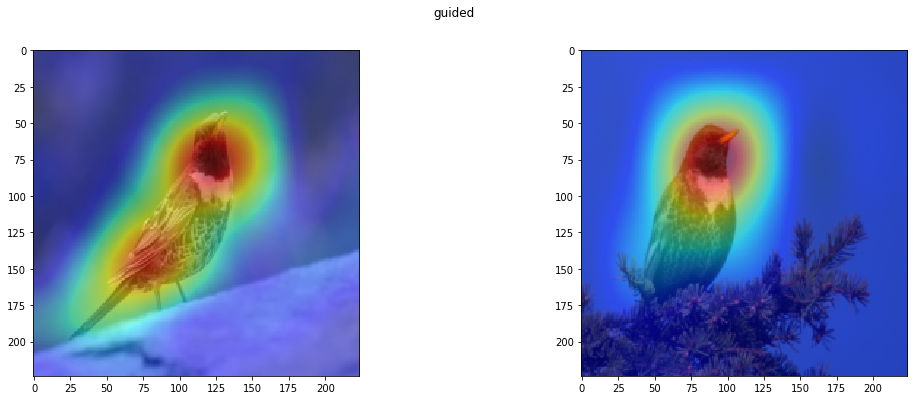

In [0]:

import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam
from vis.visualization import visualize_saliency, overlay

for modifier in [None, 'guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=20, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

# Observations

Shows the activation in the beak and body

# Setting up Grad Cam for the last but second layer (block4_conv2)



In [0]:
layer_idx_minus1 = utils.find_layer_idx(model, 'block4_conv2')
layer_idx_minus2 = utils.find_layer_idx(model, 'block4_conv3')


<Figure size 1296x432 with 0 Axes>

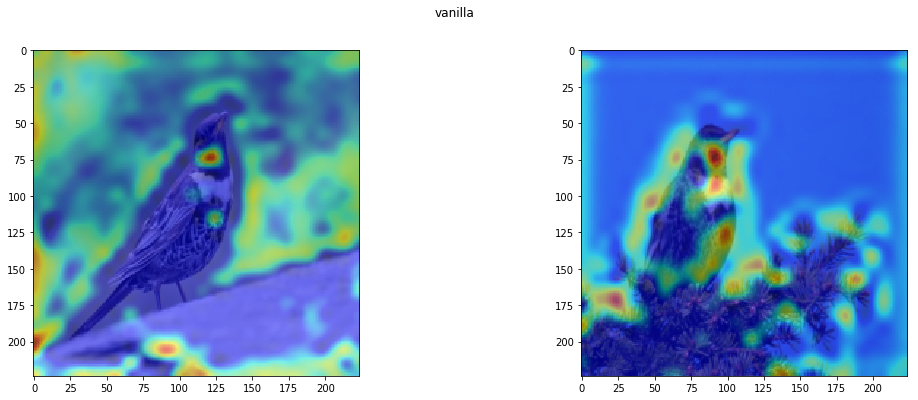

<Figure size 1296x432 with 0 Axes>

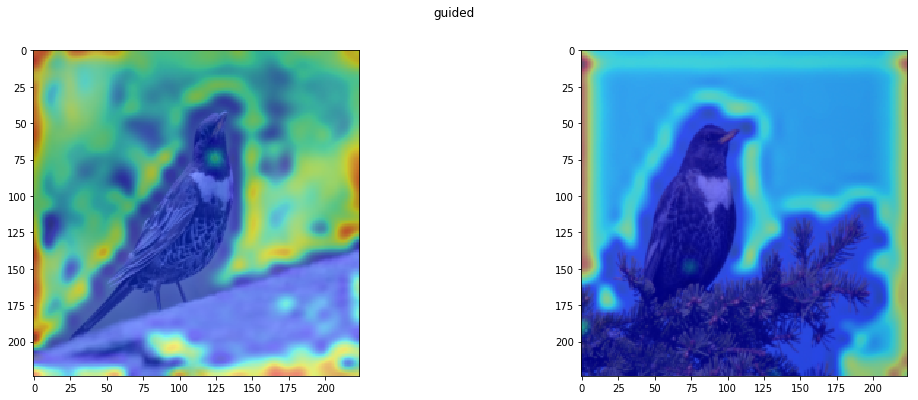

In [0]:
for modifier in [None, 'guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx_minus1, filter_indices=20, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

# Observations

We see activations on surroundings (leaves, braches).
Also on the neck of the bird

# Setting up Grad Cam for the last but one layer (block4_conv3)


In [0]:
# Setting up Grad Cam for the last but one later



<Figure size 1296x432 with 0 Axes>

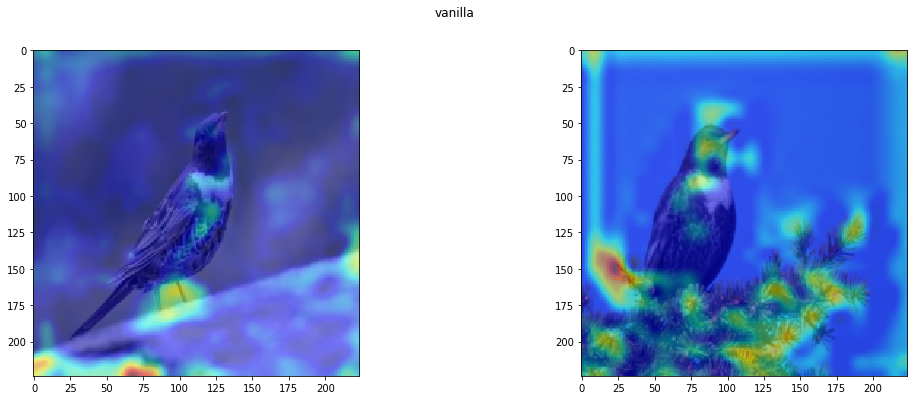

<Figure size 1296x432 with 0 Axes>

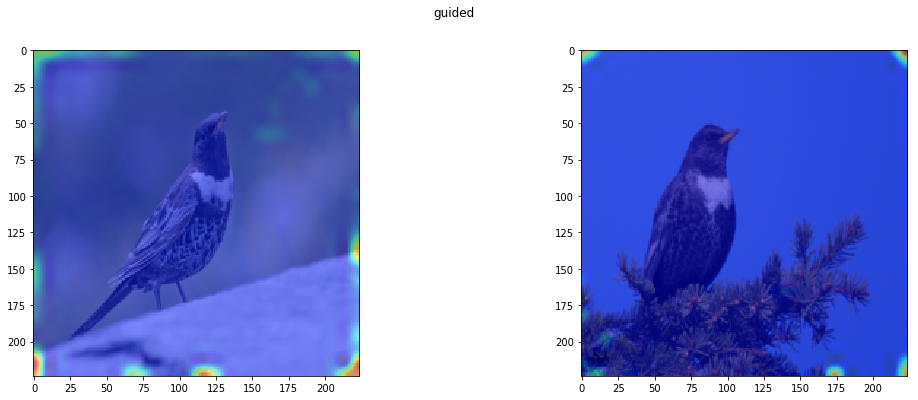

In [0]:
for modifier in [None, 'guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx_minus2, filter_indices=20, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

# Observations

We see activations on leg of the bird in one image and the surroundings (leaves, braches) on the other
